<a href="https://colab.research.google.com/github/saranyapalani/project/blob/master/pre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')


In [2]:
data=pd.read_csv('new.csv')
data.shape


(144, 2)

In [4]:
data['month']=pd.to_datetime(data['month'], infer_datetime_format=True)
data=data.set_index(['month'])
print(data.head())
print(data.tail())


            rate
month           
1949-01-01   112
1949-02-01   118
1949-03-01   132
1949-04-01   129
1949-05-01   121
            rate
month           
1960-08-01   606
1960-09-01   508
1960-10-01   461
1960-11-01   390
1960-12-01   432


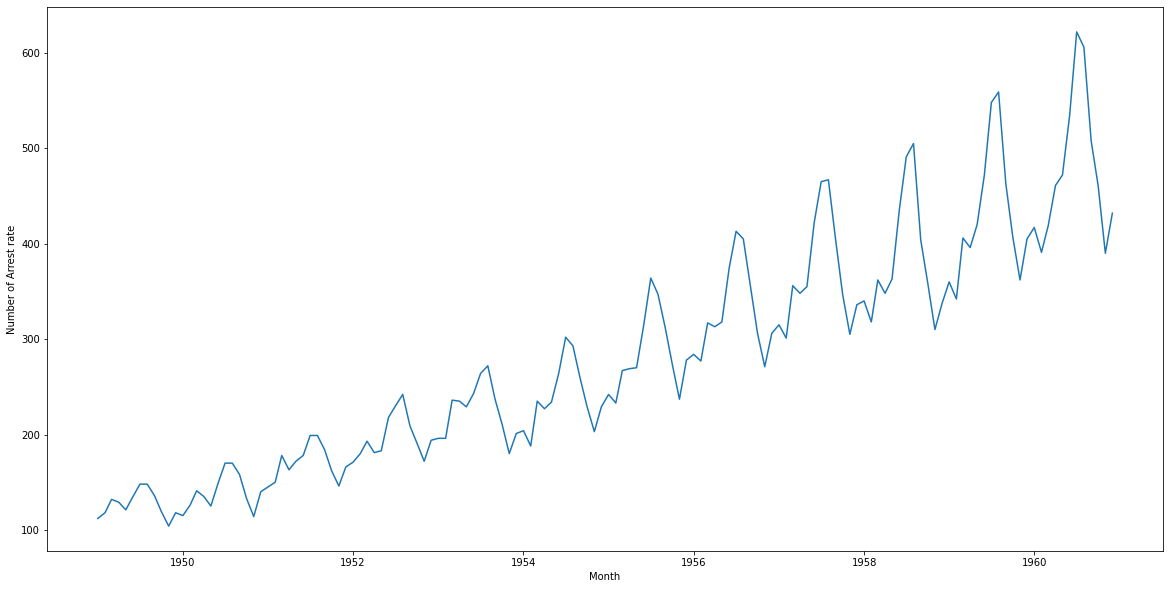

In [6]:
plt.figure(figsize=(20,10))
plt.xlabel("Month")
plt.ylabel("Number of Arrest rate")
plt.plot(data)


In [7]:
rolmean=data.rolling(window=12).mean()
rolstd=data.rolling(window=12).std()
print(rolmean.head(15))
print(rolstd.head(15))

                  rate
month                 
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01  126.666667
1950-01-01  126.916667
1950-02-01  127.583333
1950-03-01  128.333333
                 rate
month                
1949-01-01        NaN
1949-02-01        NaN
1949-03-01        NaN
1949-04-01        NaN
1949-05-01        NaN
1949-06-01        NaN
1949-07-01        NaN
1949-08-01        NaN
1949-09-01        NaN
1949-10-01        NaN
1949-11-01        NaN
1949-12-01  13.720147
1950-01-01  13.453342
1950-02-01  13.166475
1950-03-01  13.686977


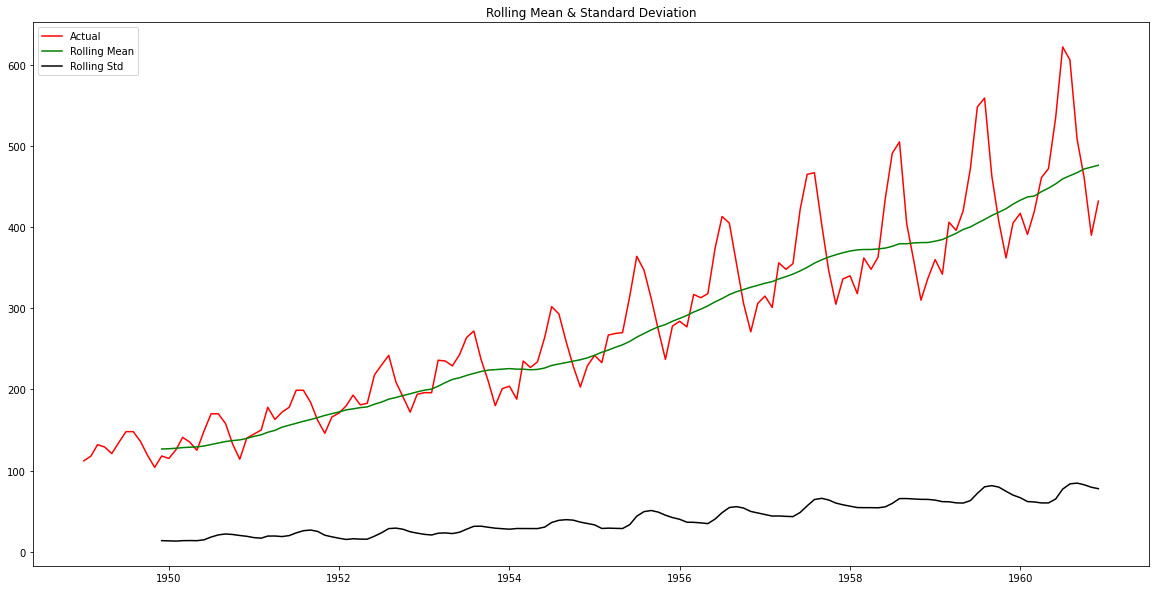

In [8]:
plt.figure(figsize=(20,10))
actual=plt.plot(data, color='red', label='Actual')
mean_6=plt.plot(rolmean, color='green', label='Rolling Mean') 
std_6=plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)


In [10]:
from statsmodels.tsa.stattools import adfuller
print('Dickey-Fuller Test: ')
dftest=adfuller(data['rate'], autolag='AIC')
dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)


Dickey-Fuller Test: 
Test Statistic            0.815369
p-value                   0.991880
Lags Used                13.000000
No. of Obs              130.000000
Critical Value (1%)      -3.481682
Critical Value (5%)      -2.884042
Critical Value (10%)     -2.578770
dtype: float64


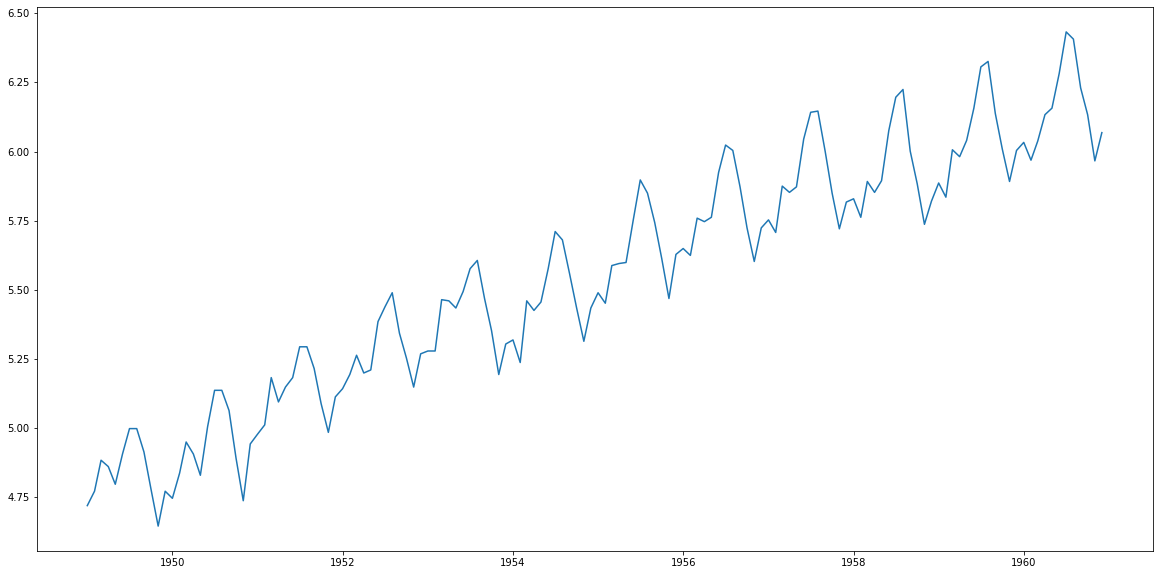

In [11]:
plt.figure(figsize=(20,10))
data_log=np.log(data)
plt.plot(data_log)


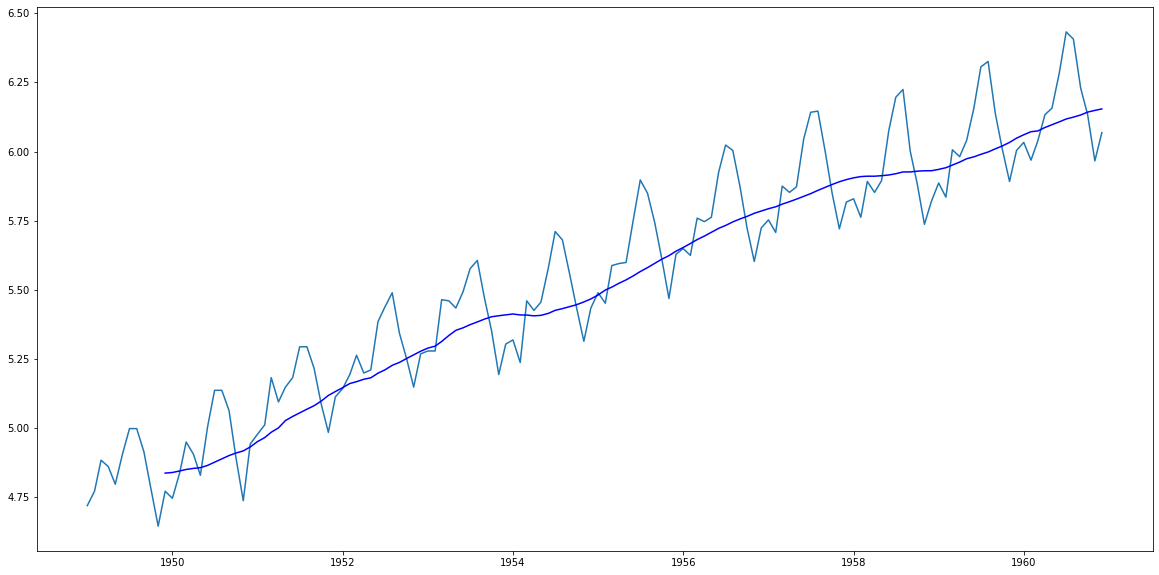

In [12]:
plt.figure(figsize=(20,10))
MAvg=data_log.rolling(window=12).mean()
MStd=data_log.rolling(window=12).std()
plt.plot(data_log)
plt.plot(MAvg, color='blue')


In [13]:
data_log_diff=data_log-MAvg
data_log_diff.head(12)

,rate
month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


In [14]:
data_log_diff=data_log_diff.dropna()
data_log_diff.head()

,rate
month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142


In [0]:
def stationarity(timeseries):
    
    rolmean=timeseries.rolling(window=12).mean()
    rolstd=timeseries.rolling(window=12).std()
    
    plt.figure(figsize=(20,10))
    actual=plt.plot(timeseries, color='red', label='Actual')
    mean_6=plt.plot(rolmean, color='green', label='Rolling Mean') 
    std_6=plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    print('Dickey-Fuller Test: ')
    dftest=adfuller(timeseries['rate'], autolag='AIC')
    dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)


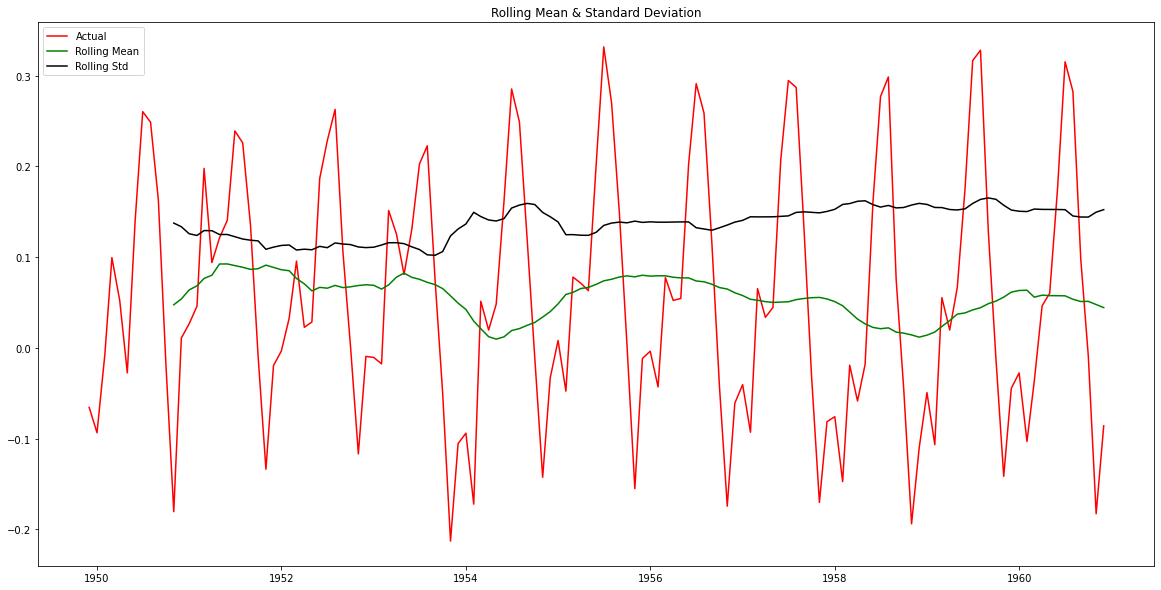

Dickey-Fuller Test: 
Test Statistic           -3.162908
p-value                   0.022235
Lags Used                13.000000
No. of Obs              119.000000
Critical Value (1%)      -3.486535
Critical Value (5%)      -2.886151
Critical Value (10%)     -2.579896
dtype: float64


In [18]:
stationarity(data_log_diff)


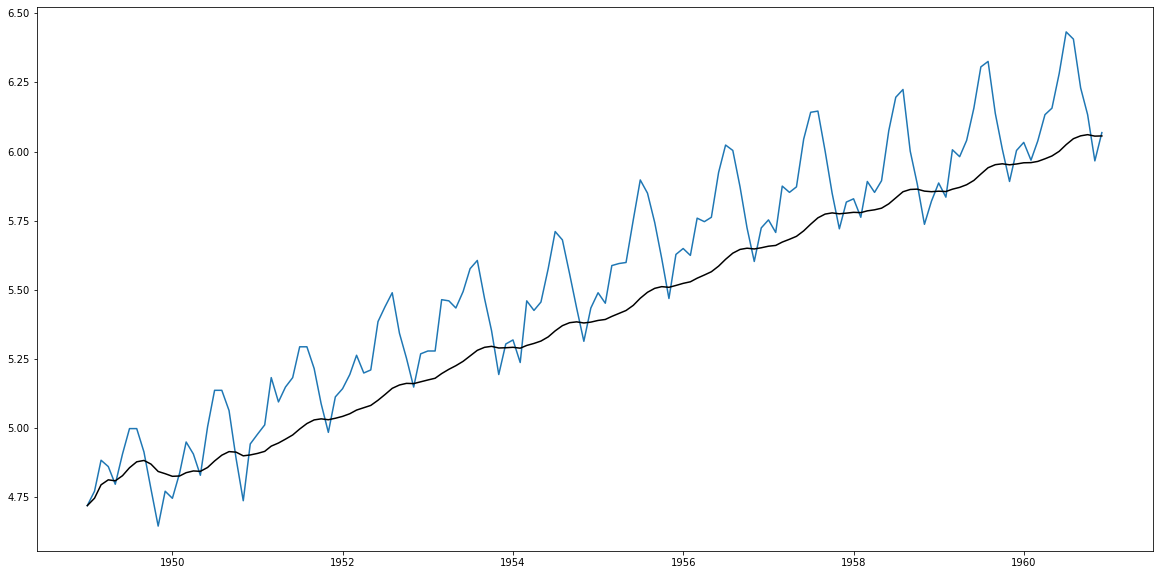

In [19]:
plt.figure(figsize=(20,10))
exp_data=data_log.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(data_log)
plt.plot(exp_data, color='black')



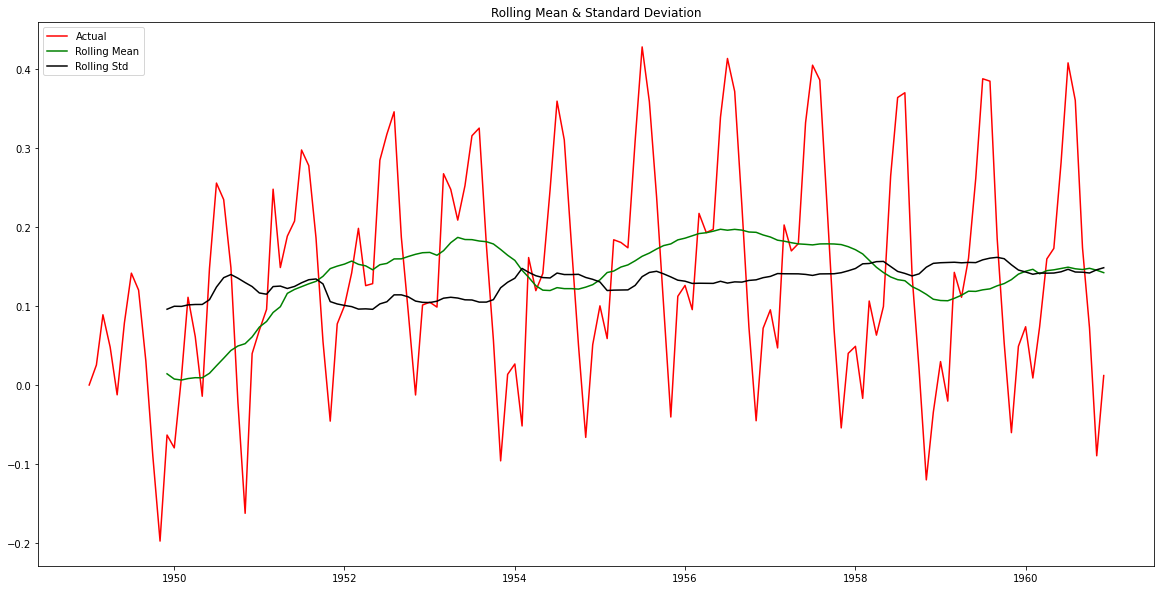

Dickey-Fuller Test: 
Test Statistic           -3.601262
p-value                   0.005737
Lags Used                13.000000
No. of Obs              130.000000
Critical Value (1%)      -3.481682
Critical Value (5%)      -2.884042
Critical Value (10%)     -2.578770
dtype: float64


In [20]:
exp_data_diff=data_log-exp_data
stationarity(exp_data_diff)


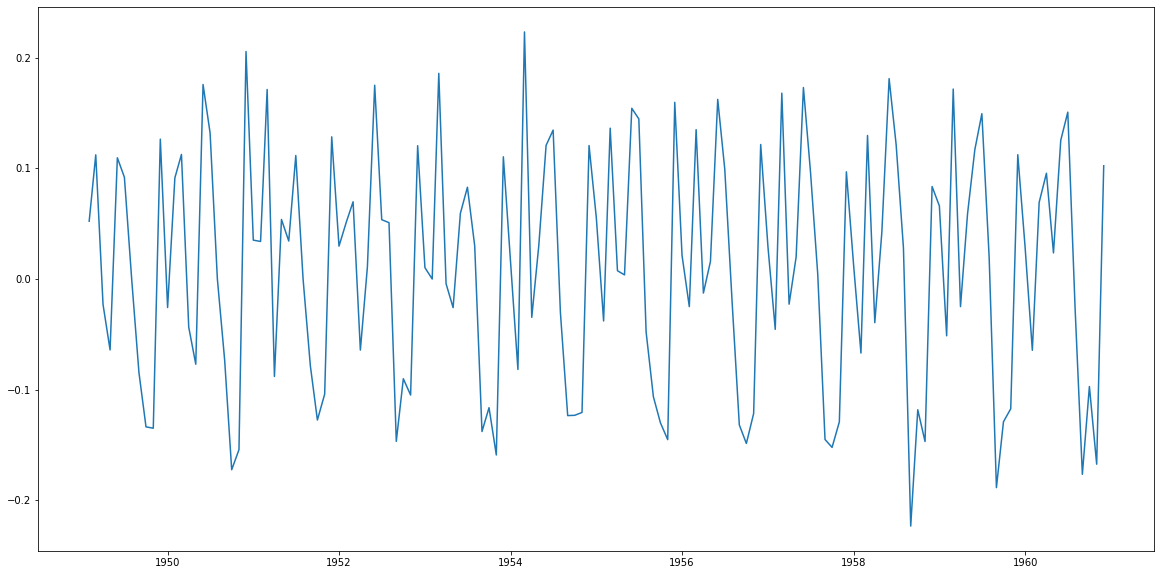

In [21]:
plt.figure(figsize=(20,10))
data_shift=data_log-data_log.shift()
plt.plot(data_shift)


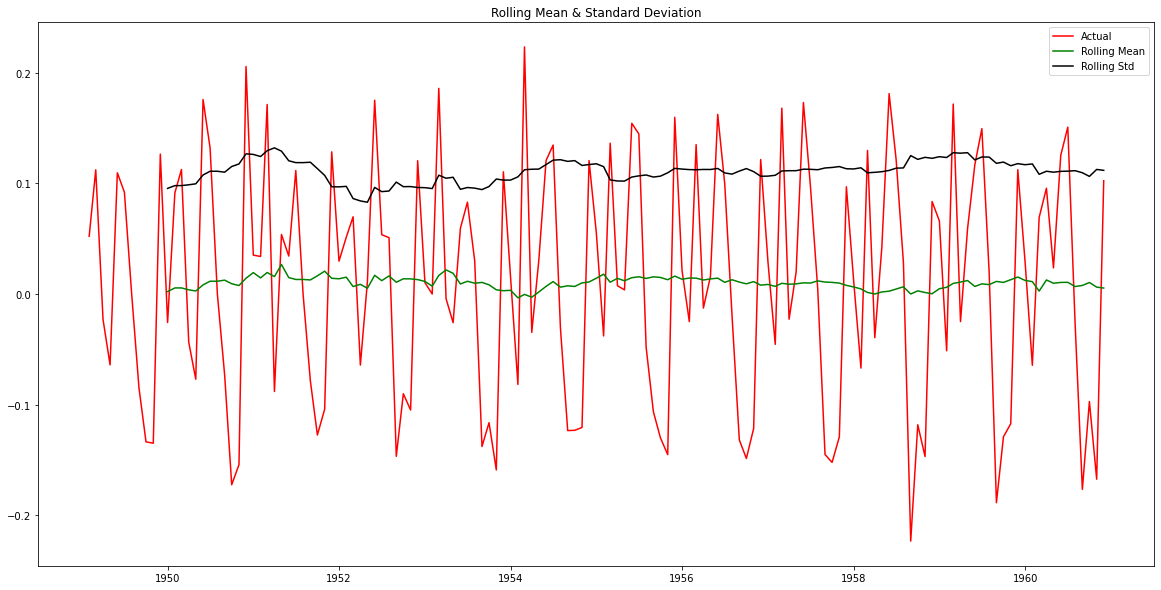

Dickey-Fuller Test: 
Test Statistic           -2.717131
p-value                   0.071121
Lags Used                14.000000
No. of Obs              128.000000
Critical Value (1%)      -3.482501
Critical Value (5%)      -2.884398
Critical Value (10%)     -2.578960
dtype: float64


In [22]:
data_shift=data_shift.dropna()
stationarity(data_shift)

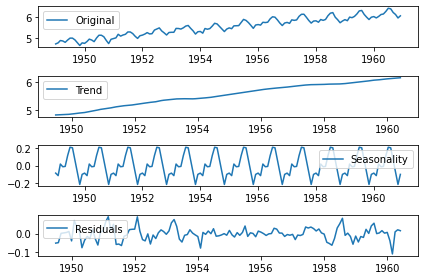

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp=seasonal_decompose(data_log)

trend=decomp.trend
seasonal=decomp.seasonal
residual=decomp.resid

plt.subplot(411)
plt.plot(data_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()


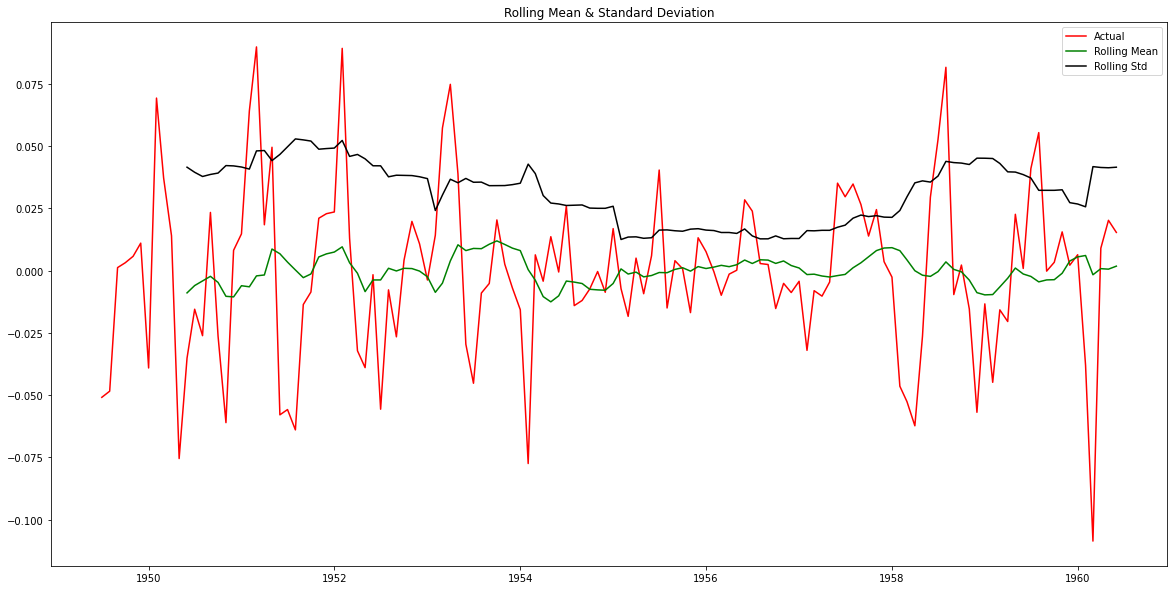

Dickey-Fuller Test: 
Test Statistic         -6.332387e+00
p-value                 2.885059e-08
Lags Used               9.000000e+00
No. of Obs              1.220000e+02
Critical Value (1%)    -3.485122e+00
Critical Value (5%)    -2.885538e+00
Critical Value (10%)   -2.579569e+00
dtype: float64


In [24]:
decomp_data=residual
decomp_data=decomp_data.dropna()
stationarity(decomp_data)

Text(0.5, 1.0, 'Partial Autocorrelation Function')

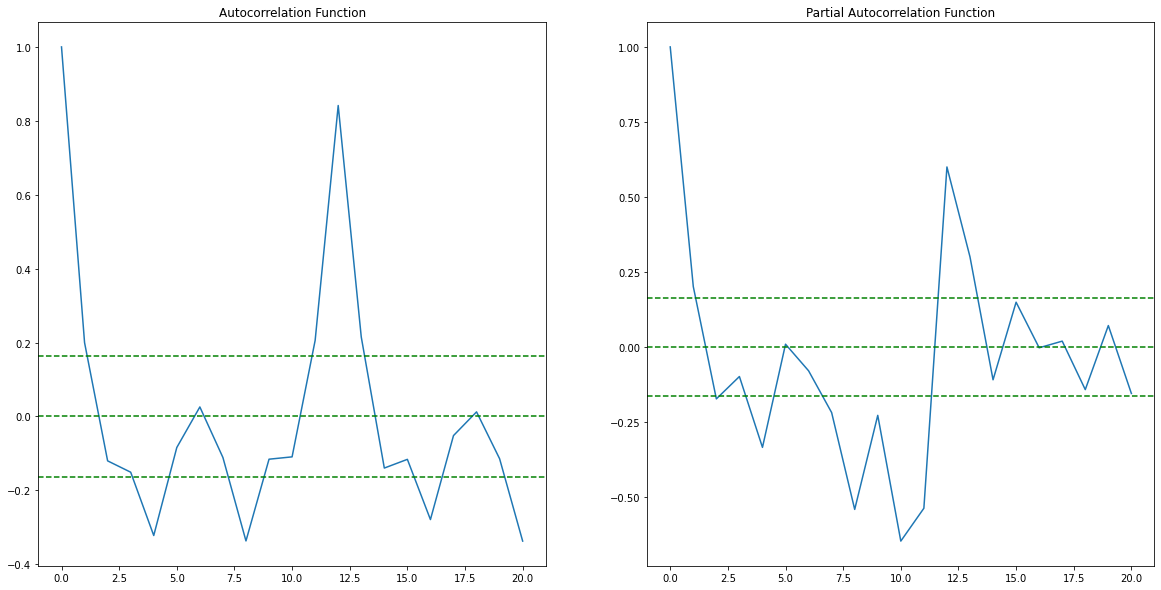

In [25]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf=acf(data_shift, nlags=20)
lag_pacf=pacf(data_shift, nlags=20, method='ols')

plt.figure(figsize=(20,10))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.title('Partial Autocorrelation Function')


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


KeyError: ignored

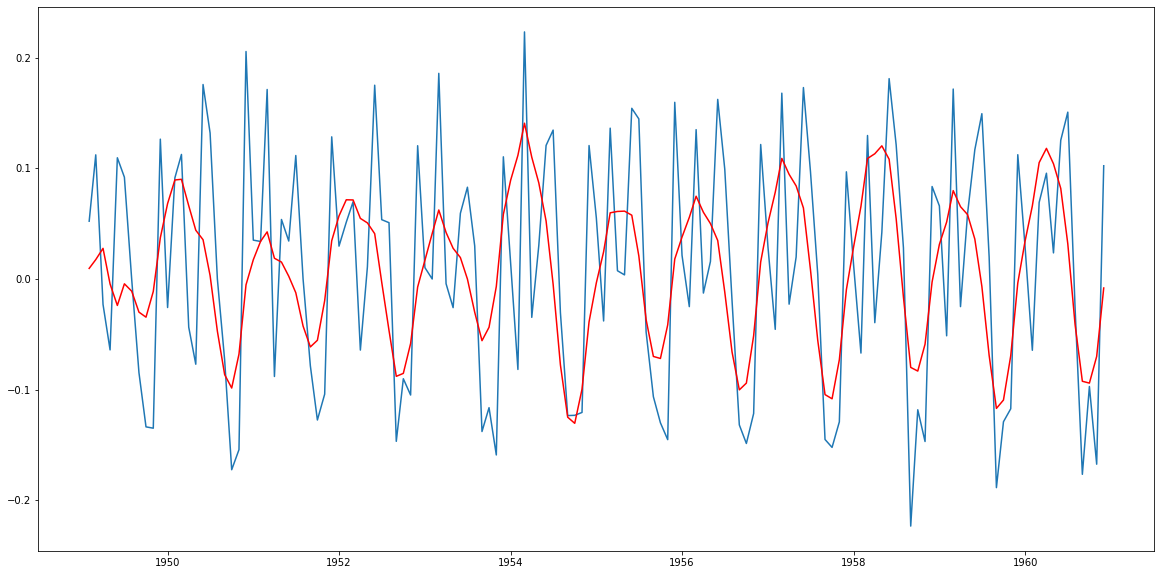

In [26]:
from statsmodels.tsa.arima_model import ARIMA

plt.figure(figsize=(20,10))
model=ARIMA(data_log, order=(2,1,2))
results=model.fit(disp=-1)
plt.plot(data_shift)
plt.plot(results.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results.fittedvalues-data_shift['Passengers'])**2))
print('plotting ARIMA model')


In [27]:
predictions=pd.Series(results.fittedvalues, copy=True)
print(predictions.head())

month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
dtype: float64


In [28]:
predictions_cum_sum=predictions.cumsum()
print(predictions_cum_sum.head())

month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64


In [30]:
predictions_log=pd.Series(data_log['rate'].ix[0], index=data_log.index)
predictions_log=predictions_log.add(predictions_cum_sum,fill_value=0)
predictions_log.head()

month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

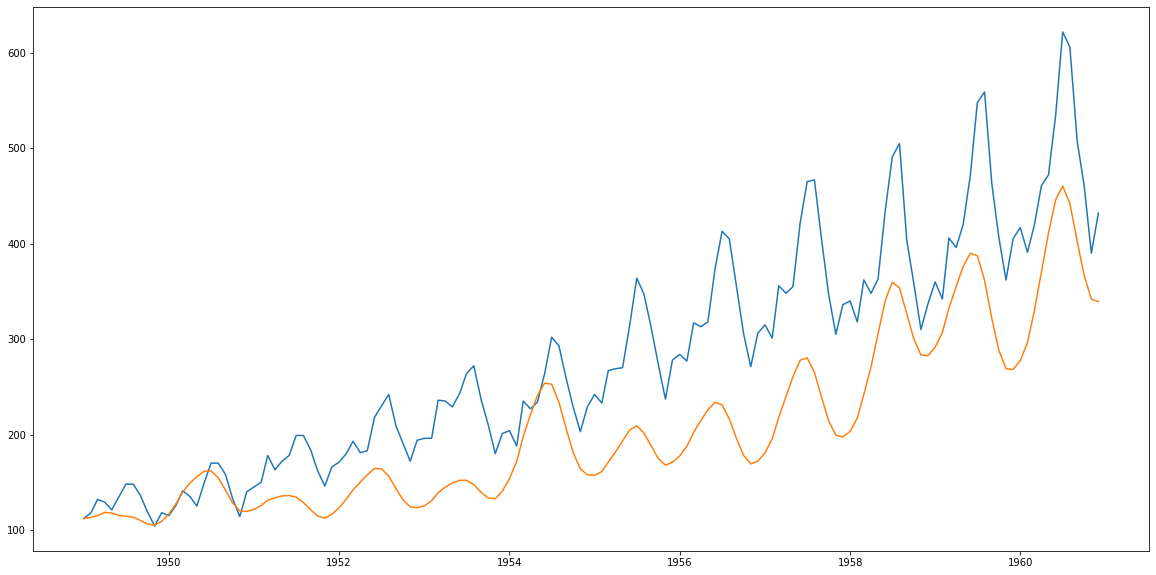

In [31]:
predictions_ARIMA=np.exp(predictions_log)
plt.figure(figsize=(20,10))
plt.plot(data)
plt.plot(predictions_ARIMA)

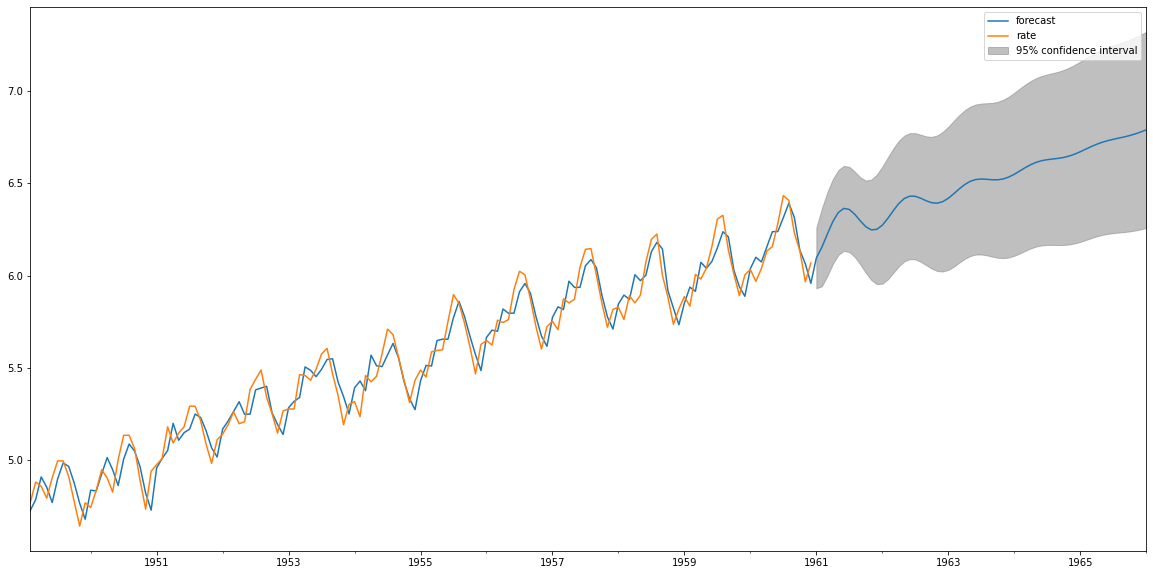

In [32]:
rcParams['figure.figsize']=20,10
results.plot_predict(1,204)
x=results.forecast(steps=120)

In [33]:
x[0]


array([6.09553389, 6.15281399, 6.22442963, 6.29241102, 6.3416472 ,
       6.36359368, 6.35784693, 6.3313931 , 6.29597544, 6.26447715,
       6.24738324, 6.25025169, 6.27275833, 6.3094031 , 6.35151493,
       6.38988657, 6.41727384, 6.43011056, 6.4290669 , 6.41842488,
       6.40456152, 6.39403611, 6.39183077, 6.40019497, 6.41833688,
       6.44295405, 6.46937434, 6.49293985, 6.51024118, 6.51989032,
       6.52267575, 6.52112382, 6.5186452 , 6.51853681, 6.52311914,
       6.53322353, 6.54812864, 6.56591553, 6.58410305, 6.60036536,
       6.61313262, 6.62192775, 6.62737781, 6.6309312 , 6.63438679,
       6.63937975, 6.64696495, 6.65739832, 6.67015317, 6.68414244,
       6.69806619, 6.71077894, 6.72157724, 6.73033975, 6.737498  ,
       6.74386367, 6.75037311, 6.7578258 , 6.7666867 , 6.77699812,
       6.78841309, 6.80032843, 6.81207184, 6.82308749, 6.83307124,
       6.8420248 , 6.85022299, 6.85811207, 6.86617326, 6.87479137,
       6.88416288, 6.8942637 , 6.90487876, 6.91567925, 6.92632

In [34]:
np.exp(x[0])


array([ 443.87096007,  470.03820972,  504.93496284,  540.45480687,
        567.73071013,  580.32812791,  577.00269002,  561.93888788,
        542.38465241,  525.56672047,  516.65908257,  518.14321742,
        529.93710409,  549.71672372,  573.36065131,  595.78899339,
        612.33152072,  620.24252079,  619.59553645,  613.03674706,
        604.59663606,  598.26637994,  596.94845366,  601.96239372,
        612.98279951,  628.25997044,  645.08000061,  660.46217493,
        671.98847123,  678.50396158,  680.39652448,  679.341412  ,
        677.6596669 ,  677.58622481,  680.6982736 ,  687.61117824,
        697.93685667,  710.46204594,  723.50181111,  735.36381387,
        744.81258292,  751.39220077,  755.49851263,  758.18786523,
        760.81238493,  764.62058635,  770.44243921,  778.52283068,
        788.51637019,  799.62465743,  810.83630864,  821.21006269,
        830.12578707,  837.43173105,  843.44778858,  848.83402227,
        854.37747727,  860.76867965,  868.42975508,  877.43082